In [3]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
cat4 = cv2.imread('CATS_DOGS/train/CAT/4.jpg')

In [6]:
cat4 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)

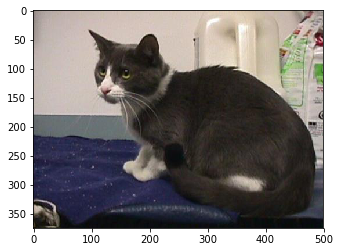

In [7]:
plt.imshow(cat4)

In [8]:
cat4.shape

(375, 500, 3)

In [9]:
dog = cv2.imread('CATS_DOGS/train/DOG/2.jpg')

In [10]:
dog = cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)

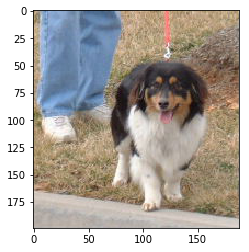

In [11]:
plt.imshow(dog)

In [12]:
dog.shape

(199, 188, 3)

In [13]:
from keras.preprocessing.image import ImageDataGenerator

In [15]:
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')

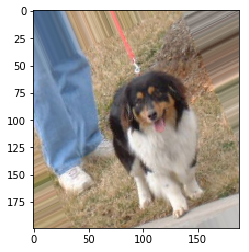

In [19]:
plt.imshow(image_gen.random_transform(dog))

In [20]:
image_gen.flow_from_directory('CATS_DOGS/train/')

Found 18743 images belonging to 2 classes.


In [21]:
from keras.models import Sequential

In [23]:
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Activation,Dropout

In [26]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# complex degerler oldukalari icin 3 defa icerisine add islemi yaptik

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5)) #0.5 -->%50 overfittingi onlemek icin

model.add(Dense(1))#kedi ve kopek oldugunu ayirmak icin 0 kedi icin 1 kopek icin
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)             0         
__________

In [31]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('CATS_DOGS/train/',target_size=(150,150),
                                               batch_size=batch_size,class_mode='binary')

Found 18743 images belonging to 2 classes.


In [32]:
batch_size = 16

test_image_gen = image_gen.flow_from_directory('CATS_DOGS/test/',target_size=(150,150),
                                               batch_size=batch_size,class_mode='binary')

Found 6251 images belonging to 2 classes.


In [33]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [34]:
results = model.fit_generator(train_image_gen,epochs=1,steps_per_epoch=150,
                             validation_data=test_image_gen,validation_steps=12)

Epoch 1/1
 42/150 [=======>......................] - ETA: 27s - loss: 0.7099 - acc: 0.4866

C:\Users\husey\anaconda3\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 18350080 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\husey\anaconda3\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:764: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 6. 
  warnings.warn(str(msg))


 46/150 [========>.....................] - ETA: 26s - loss: 0.7086 - acc: 0.4864

C:\Users\husey\anaconda3\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 262146 bytes but only got 0. Skipping tag 2
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\husey\anaconda3\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 262151 bytes but only got 0. Skipping tag 56
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\husey\anaconda3\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:764: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 0. 
  warnings.warn(str(msg))


139/150 [==========================>...] - ETA: 2s - loss: 0.6994 - acc: 0.5207

C:\Users\husey\anaconda3\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\husey\anaconda3\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\husey\anaconda3\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 307363840 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\husey\anaconda3\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 307888128 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\husey\anaco

150/150 [==============================] - 95s 635ms/step - loss: 0.6987 - acc: 0.5217 - val_loss: 0.6919 - val_acc: 0.5039


In [35]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
results.history['acc']

[0.5216666666666666]

In [39]:
from keras.models import load_model

In [42]:
#new_model = load_model('Computer-Vision-with-Python/06-Deep-Learning-Computer-Vision/cat_dog_100epochs.h5')

In [43]:
dog_file = 'CATS_DOGS/test/DOG/10005.jpg'

In [44]:
from keras.preprocessing import image

In [45]:
dog_img = image.load_img(dog_file,target_size=(150,150))

In [46]:
dog_img = image.img_to_array(dog_img)

In [48]:
dog_img.shape

(150, 150, 3)

In [49]:
import numpy as np

In [50]:
dog_img = np.expand_dims(dog_img,axis=0)

In [51]:
dog_img.shape

(1, 150, 150, 3)

In [52]:
dog_img = dog_img/dog_img.max()

In [53]:
model.predict_classes(dog_img)

array([[1]])

In [54]:
model.predict(dog_img)

array([[0.5758801]], dtype=float32)